In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

# 데이터 전처리

In [2]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [3]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [4]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [5]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [6]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [7]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [8]:
train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [9]:
test.head()

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,125,2,304,3,2010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,113,4,275,3,2010,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,115,3,419,7,2010,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,116,2,408,2,2010,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,110,1,380,1,2010,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# 모델 생성 및 예측(과제부분)

In [10]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

RandomForestRegressor

In [11]:
model=RandomForestRegressor()

model.fit(train_x,train_y)

from sklearn.model_selection import GridSearchCV
 
param_grid = {'n_estimators':[10,20,50,100],'max_depth':[5,10],'min_samples_split':[10,100]}
 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
 
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'min_samples_split': [10, 100],
                         'n_estimators': [10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [12]:
print(-grid_search.best_score_)
print(grid_search.best_params_)

2111600258969.4897
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [13]:
best_tree = grid_search.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=20)

In [14]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

pred = model.predict(test)

# 제출

In [15]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [16]:
submission['box_off_num'] = pred

In [17]:
submission

,title,box_off_num
0,용서는 없다,2763103.65
1,아빠가 여자를 좋아해,2014802.57
2,하모니,2011457.29
3,의형제,1946433.28
4,평행 이론,1075649.70
...,...,...
238,해에게서 소년에게,97052.14
239,울보 권투부,3267.90
240,어떤살인,347399.59
241,말하지 못한 비밀,8190.23


In [18]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

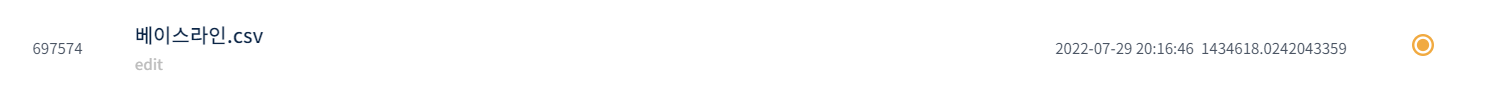